In [98]:
from btcgame import Game, Predictor

In [104]:
import pandas as pd
import numpy as np
import os

headers = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume(BTC)', 'Volume(Currency)', 'WeightedPrice']
data = pd.DataFrame(columns=headers)

for filename in os.listdir('../datasets/bitcoin-5')[10:15]:
    data = pd.concat([data, pd.read_csv(f'../datasets/bitcoin-5/{filename}', index_col=False)])
    print(filename)
    
data['Change'] = data['Open'] - data['Close']
data['PerChange'] = (data['Open'] - data['Close'])/data['WeightedPrice']

2020-06-11.csv
2020-06-12.csv
2020-06-13.csv
2020-06-14.csv
2020-06-15.csv


In [105]:
from random import randint, uniform

class MyPredictor(Predictor):
    
    def predict_engine(self, pasts, data):
        
        return (randint(-1,1), 0.25)
    


In [106]:
game = Game(pd.DataFrame(data['WeightedPrice']), MyPredictor(preceding=5), cash=0)

In [107]:
game.play()

,Price,Action,Trade,Cash($),Holding(BTC),Capital($),Capped
0,9771.408589,0.0,0.00,0.000000,1.00,9771.408589,0
1,9774.063775,0.0,0.00,0.000000,1.00,9774.063775,0
2,9773.849735,0.0,0.00,0.000000,1.00,9773.849735,0
3,9772.434807,0.0,0.00,0.000000,1.00,9772.434807,0
4,9773.019790,0.0,0.00,0.000000,1.00,9773.019790,0
...,...,...,...,...,...,...,...
1440,9350.585200,1.0,0.25,182.516971,1.00,9533.102171,0
1441,9346.150634,-1.0,0.25,2519.054629,0.75,9528.667605,0
1442,9333.968562,0.0,0.25,2519.054629,0.75,9519.531051,0
1443,9332.153565,1.0,0.25,186.016238,1.00,9518.169803,0


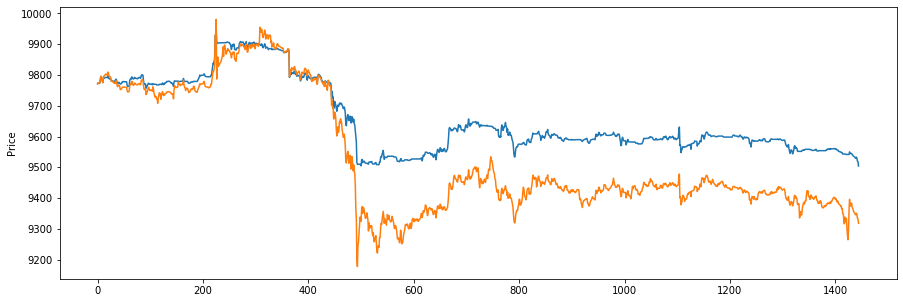

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,5))

sns.lineplot(x=range(len(game.history)), y=game.history['Capital($)'], ax=ax)
sns.lineplot(x=range(len(game.history)), y=game.history['Price'], ax=ax)

In [109]:
game.history["Capital($)"].describe()

count    1445.000000
mean     9656.454094
std       117.149534
min      9504.169098
25%      9575.727617
50%      9601.388285
75%      9776.573312
max      9952.772033
Name: Capital($), dtype: float64